In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the training and testing data 

(mnist_train, mnist_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist_train, mnist_test

# Preprocess the data

X_train = X_train.astype('float32') / 255.0  # Normalize to [0, 1]
X_test = X_test.astype('float32') / 255.0    # Normalize to [0, 1]
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)    # One-hot encode labels


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
# Define the network architecture using Keras

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(Dense(128, activation='relu'))    # Hidden layer with 128 neurons
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Train the model using SGD

model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7051 - loss: 1.1393 - val_accuracy: 0.9007 - val_loss: 0.3753
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.3823 - val_accuracy: 0.9153 - val_loss: 0.3085
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9092 - loss: 0.3242 - val_accuracy: 0.9230 - val_loss: 0.2748
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9187 - loss: 0.2850 - val_accuracy: 0.9282 - val_loss: 0.2520
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9267 - loss: 0.2587 - val_accuracy: 0.9345 - val_loss: 0.2351
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9321 - loss: 0.2378 - val_accuracy: 0.9377 - val_loss: 0.2219
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9380 - loss: 0.2199 - val_accuracy: 0.9434 - val_loss: 0.2075
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9422 - loss: 0.2056 - 

In [5]:
# Evaluate the network

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.2104
Test Loss: 0.1813, Test Accuracy: 0.9486


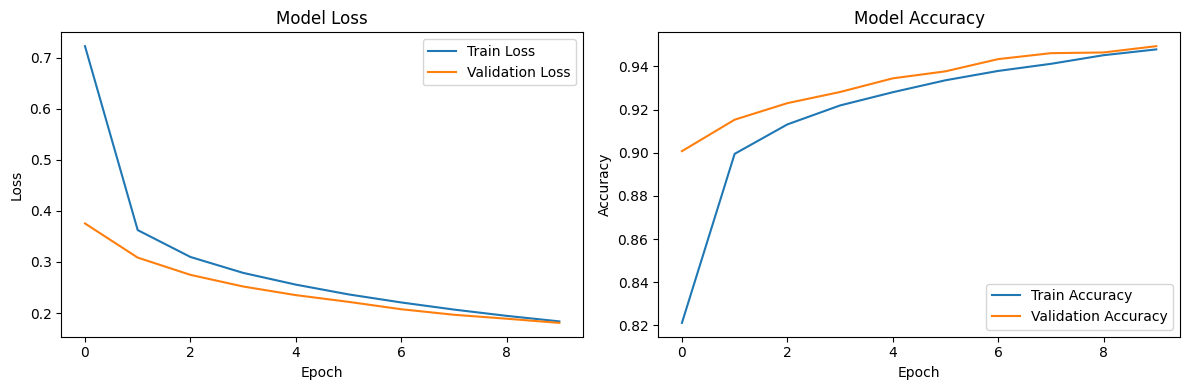

In [6]:
# Plot the training loss and accuracy

plt.figure(figsize=(12, 4))

# Plot training 

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
